In [17]:
import os
path ="../EDA/data/deep_running_data/dogs-vs-cats/train/"
os.listdir(path)

['dog.860.jpg',
 'cat.5283.jpg',
 'cat.8477.jpg',
 'dog.7904.jpg',
 'dog.6841.jpg',
 'cat.4769.jpg',
 'cat.2725.jpg',
 'dog.4348.jpg',
 'cat.8133.jpg',
 'cat.5436.jpg',
 'dog.3817.jpg',
 'cat.10665.jpg',
 'dog.2730.jpg',
 'dog.10460.jpg',
 'cat.1046.jpg',
 'dog.1319.jpg',
 'dog.2884.jpg',
 'cat.8554.jpg',
 'cat.10743.jpg',
 'cat.8188.jpg',
 'cat.11656.jpg',
 'dog.12133.jpg',
 'cat.10909.jpg',
 'cat.10081.jpg',
 'cat.2949.jpg',
 'dog.2976.jpg',
 'dog.11348.jpg',
 'cat.2424.jpg',
 'cat.2053.jpg',
 'cat.344.jpg',
 'dog.3291.jpg',
 'cat.8326.jpg',
 'cat.3869.jpg',
 'dog.7657.jpg',
 'cat.11783.jpg',
 'dog.6893.jpg',
 'cat.2865.jpg',
 'dog.7420.jpg',
 'dog.5322.jpg',
 'dog.374.jpg',
 'cat.10298.jpg',
 'cat.626.jpg',
 'cat.320.jpg',
 'dog.11212.jpg',
 'cat.11534.jpg',
 'dog.10249.jpg',
 'dog.7239.jpg',
 'dog.10489.jpg',
 'cat.3421.jpg',
 'cat.10374.jpg',
 'dog.5058.jpg',
 'dog.4342.jpg',
 'cat.6348.jpg',
 'dog.3465.jpg',
 'dog.7071.jpg',
 'cat.12273.jpg',
 'dog.5534.jpg',
 'dog.4104.jpg',
 'd

In [18]:
full_names = os.listdir(path)[:10000]
lables = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1]for each in full_names]

1.5 약간은 난감했던 그 데이터

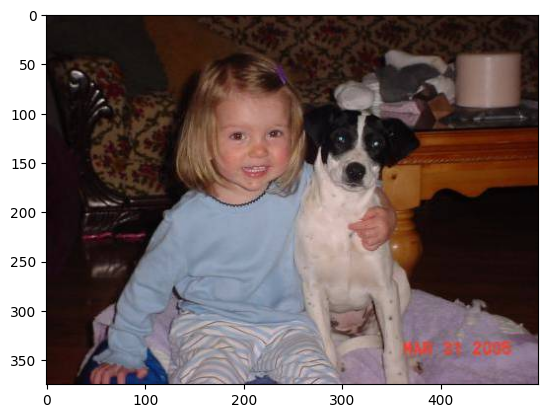

In [19]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path +sample)
plt.imshow(image)
plt.show()

1.6 사진 크기도 제각각이었고

In [20]:
sample = random.choice(full_names)
image = mpimg.imread(path +sample)
image.shape

(499, 333, 3)

In [21]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [22]:
from skimage.transform import resize

1.7 그래서 크기는 하나로 고정하고

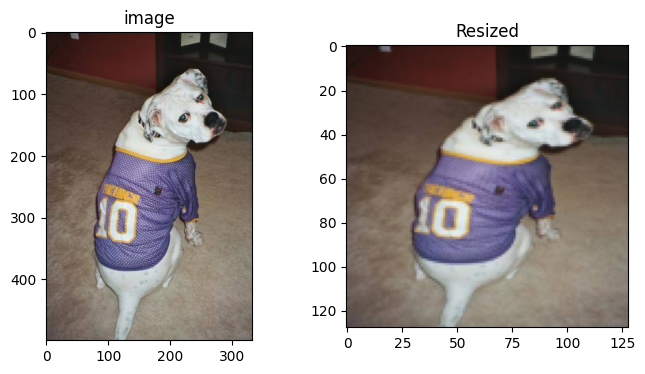

In [23]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig,axes = plt.subplots(1 ,2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap =plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout
plt.show()

1.9 일단 크기 바꿔서 다 일고

In [24]:
# from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
# bar_total =(full_names[:5000])
bar_total =(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128, 128, 3)))

images = np.array(images)

: 

1.10 이렇게 생긴 아이를

In [ ]:
# labels = lables[:5000]

images.shape, labels

In [ ]:
images[:3]

1.11 Label 인코딩 하고

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

1.12 데이터 나누고

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size = 0.2,
random_state =13, stratify = labels_encoded)

X_train.shape, X_test.shape 

1.13 어떤 놈들이냐면

In [ ]:
samples = random.choices(population=range(0,5000), k =8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap ='Greys',
               interpolation ='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

1.15 모델 만들고

In [ ]:
from tensorflow.keras impot layers, models

model = models.Sequential([layers.Conv2D(32,(3,3), activation ='relu', input_shape=(128,128,3)),
                           layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
                           layers.Dropout(0.25),
                           
                           layers.conv2D(64,(3,3), activation'relu',padding ='same'),
                           layers.Maxpooling2D])